In [1]:
## David Hui
## 02/03/2018

In [2]:
import sqlalchemy

from sqlalchemy import create_engine
from sqlalchemy import inspect

from sqlalchemy.ext.declarative import  declarative_base
from sqlalchemy.ext.automap import  automap_base
from sqlalchemy.sql import func

Base = declarative_base()

from sqlalchemy import Column, Integer, String, Float, Date

import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime


In [3]:
from sqlalchemy.orm import Session

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()
Base.prepare(engine,reflect=True)
Base.classes.keys()

['measure', 'station']

In [4]:
Base.metadata.create_all(engine)
session = Session(bind=engine)

In [5]:
Stations = Base.classes.station
Measures = Base.classes.measure

In [6]:
#print(Stations.__table__.columns)

In [7]:
#for row in session.query(Stations).all():
#    print(row)

In [8]:
from sqlalchemy.sql import extract
#group_by(extract('year',Measures.date), extract('month',Measures.date)).\
prcp_row = session.query(Measures.date, func.sum(Measures.prcp)).\
filter(Measures.date.between('2016-09-01','2017-08-31')).\
group_by(Measures.date).\
order_by(Measures.date).all()

print(len(prcp_row))
print(prcp_row)

357
[(datetime.datetime(2016, 9, 1, 0, 0), 0.03), (datetime.datetime(2016, 9, 2, 0, 0), 0.25), (datetime.datetime(2016, 9, 3, 0, 0), 1.27), (datetime.datetime(2016, 9, 4, 0, 0), 1.3800000000000001), (datetime.datetime(2016, 9, 5, 0, 0), 0.33999999999999997), (datetime.datetime(2016, 9, 6, 0, 0), 1.23), (datetime.datetime(2016, 9, 7, 0, 0), 2.0), (datetime.datetime(2016, 9, 8, 0, 0), 0.4600000000000001), (datetime.datetime(2016, 9, 9, 0, 0), 1.0699999999999998), (datetime.datetime(2016, 9, 10, 0, 0), 1.4), (datetime.datetime(2016, 9, 11, 0, 0), 1.25), (datetime.datetime(2016, 9, 12, 0, 0), 1.54), (datetime.datetime(2016, 9, 13, 0, 0), 2.71), (datetime.datetime(2016, 9, 14, 0, 0), 14.280000000000001), (datetime.datetime(2016, 9, 15, 0, 0), 4.96), (datetime.datetime(2016, 9, 16, 0, 0), 0.8200000000000001), (datetime.datetime(2016, 9, 17, 0, 0), 0.6799999999999999), (datetime.datetime(2016, 9, 18, 0, 0), 0.53), (datetime.datetime(2016, 9, 19, 0, 0), 0.32), (datetime.datetime(2016, 9, 20, 0

In [9]:
prcp_xtickslabels = session.query(Measures.date).\
filter(Measures.date.between('2016-09-01','2017-08-31')).\
group_by(extract('year',Measures.date), extract('month',Measures.date)).\
order_by(Measures.date).all()
#print(prcp_xtickslabels)

In [10]:
from sqlalchemy import Date, cast
import datetime

prcp = [prcp[1] for prcp in prcp_row]

prcp_date = [datetime.datetime.strptime(str(prcp_date[0]),'%Y-%m-%d %H:%M:%S').date() for prcp_date in prcp_row]

# prcp_date = [prcp[0] for prcp_date in prcp_row]

#max_date = prcp_date[len(prcp_date)-1]
#min_date = prcp_date[0]

print(prcp_date)

[datetime.date(2016, 9, 1), datetime.date(2016, 9, 2), datetime.date(2016, 9, 3), datetime.date(2016, 9, 4), datetime.date(2016, 9, 5), datetime.date(2016, 9, 6), datetime.date(2016, 9, 7), datetime.date(2016, 9, 8), datetime.date(2016, 9, 9), datetime.date(2016, 9, 10), datetime.date(2016, 9, 11), datetime.date(2016, 9, 12), datetime.date(2016, 9, 13), datetime.date(2016, 9, 14), datetime.date(2016, 9, 15), datetime.date(2016, 9, 16), datetime.date(2016, 9, 17), datetime.date(2016, 9, 18), datetime.date(2016, 9, 19), datetime.date(2016, 9, 20), datetime.date(2016, 9, 21), datetime.date(2016, 9, 22), datetime.date(2016, 9, 23), datetime.date(2016, 9, 24), datetime.date(2016, 9, 25), datetime.date(2016, 9, 26), datetime.date(2016, 9, 27), datetime.date(2016, 9, 28), datetime.date(2016, 9, 29), datetime.date(2016, 9, 30), datetime.date(2016, 10, 1), datetime.date(2016, 10, 2), datetime.date(2016, 10, 3), datetime.date(2016, 10, 4), datetime.date(2016, 10, 5), datetime.date(2016, 10, 6), 

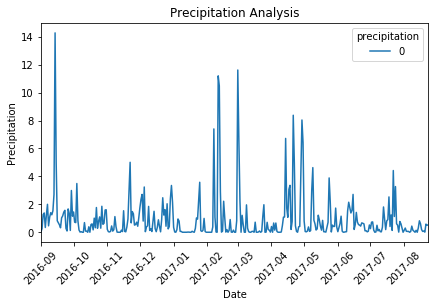

In [11]:
df = pd.DataFrame(prcp, prcp_date)
df.head()


#df.set_index(df['prcp_date'], inplace=True)

df.plot(x_compat=True)
plt.xticks(rotation='45')
plt.legend(loc="best",title="precipitation")
plt.tight_layout()
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.title("Precipitation Analysis")
plt.savefig("precipitation.png")
plt.show()

In [12]:
prcp_stat = session.query(Measures.date, Measures.prcp).\
filter(Measures.date.between('2016-09-01','2017-08-31')).\
order_by(Measures.date).all()
#print(prcp_stat)

stat_df = pd.DataFrame(prcp_stat)
stat_df.reset_index(inplace=True)
#stat_df.set_index('date',inplace=True)
del stat_df['index']



In [13]:
### Precipitation Analysis

stat_df.rename(columns={'prcp':'precipitation'}, inplace=True)
stat_df.describe()

,precipitation
count,2171.000000
mean,0.155444
std,0.433053
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [14]:
### Station Analysis
### Design a query to calculate the total number of stations.

Stations_count = session.query(Stations.name).count()
print("Total number of stations: " + str(Stations_count))

Total number of stations: 9


In [15]:
### Design a query to find the most active stations.

####### List the stations and observation counts in descending order

join_result=session.query(Measures.station, func.count(Measures.station)).\
filter(Stations.station == Measures.station).\
group_by(Measures.station).\
order_by(Measures.station.desc()).all()

for row in join_result:
    print("Station: " + row[0] + " observation count: " + str(row[1]))

Station: USC00519523 observation count: 2669
Station: USC00519397 observation count: 2724
Station: USC00519281 observation count: 2772
Station: USC00518838 observation count: 511
Station: USC00517948 observation count: 1372
Station: USC00516128 observation count: 2612
Station: USC00514830 observation count: 2202
Station: USC00513117 observation count: 2709
Station: USC00511918 observation count: 1979


In [16]:
####### Which station has the highest number of observations?

Highest_Count_Station=session.query(Measures.station, func.count(Measures.station)).\
filter(Stations.station == Measures.station).\
group_by(Measures.station).\
order_by(func.count(Measures.station).desc()).first()

print("Station, " + Highest_Count_Station[0] + ", has the highest number of observations.")

Station, USC00519281, has the highest number of observations.


In [17]:

### Design a query to retrieve the last 12 months of temperature observation data (tobs).

###### Filter by the station with the highest number of observations.

tobs = session.query(Stations.name,func.max(Measures.tobs)).\
filter(Measures.date.between('2016-09-01','2017-08-31')).\
filter(Stations.station == Measures.station).\
order_by(func.count(Measures.station).desc()).first()


print("Station with the highest number of observations : " + tobs[0])


Station with the highest number of observations : WAIKIKI 717.2, HI US


In [18]:
###### Plot the results as a histogram with `bins=12`.

tobs_hist = session.query(Measures.tobs).\
filter(Measures.date.between('2016-09-01','2017-08-31')).\
order_by(Measures.tobs.desc()).all()

tobs_list = pd.DataFrame(tobs_hist)

print(tobs_list)

      tobs
0       87
1       87
2       85
3       84
4       84
5       84
6       84
7       84
8       83
9       83
10      83
11      83
12      83
13      83
14      83
15      83
16      83
17      83
18      83
19      83
20      82
21      82
22      82
23      82
24      82
25      82
26      82
27      82
28      82
29      82
...    ...
2141    63
2142    63
2143    63
2144    62
2145    62
2146    62
2147    62
2148    62
2149    62
2150    62
2151    62
2152    62
2153    62
2154    62
2155    62
2156    62
2157    61
2158    61
2159    61
2160    61
2161    60
2162    60
2163    60
2164    60
2165    60
2166    60
2167    59
2168    59
2169    59
2170    58

[2171 rows x 1 columns]


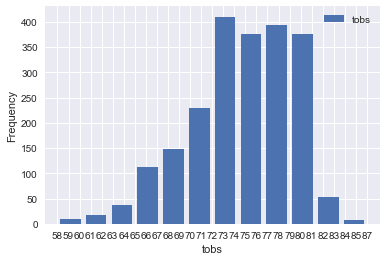

In [19]:
#import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns

sns.set()
plt.hist(tobs_list,bins=12, rwidth=0.8, label="tobs")
plt.ylabel('Frequency')
plt.xlabel('tobs')
plt.savefig("tobs_histogram.png")
#plt.tight_layout()
#plt.axis([0, 28, 0,500])

plt.legend()
plt.show()

In [20]:
### Temperature Analysis

## Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` 
## and return the minimum, average, and maximum temperatures for that range of dates.

## Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the 
## matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

## Plot the min, avg, and max temperature from your previous query as a bar chart.

## Use the average temperature as the bar height.

## Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).



In [26]:
def calc_temps(startDate, endDate):
   
    temp_ds = session.query(func.max(Measures.tobs), func.min(Measures.tobs), func.avg(Measures.tobs)).\
    filter(Measures.date.between(func.datetime(endDate), func.datetime(startDate))).\
    order_by(Measures.tobs.desc()).all()

    return(temp_ds)
    


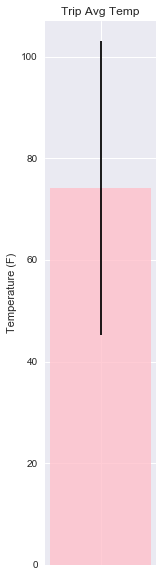

In [32]:
resultSet=calc_temps('2018-01-01','2017-01-01')
#labels=['MAX','MIN','AVG']
labels=[' ']
plt.figure(figsize=(2,10))

max_temp = resultSet[0][0]
min_temp = resultSet[0][1]
avg_temp = resultSet[0][2]
#data = [max_temp, min_temp, avg_temp]
data = [avg_temp]

y_pos = np.arange(len(labels))
plt.xticks(y_pos, labels)

plt.ylim(0,max_temp+20)
plt.ylabel('Temperature (F)')
plt.title('Trip Avg Temp')

plt.bar(y_pos,data,align='center',  alpha=0.8, color='pink', yerr=(max_temp-min_temp))

plt.show()



In [42]:
####  Step 4 - Climate App
# 
results =   session.query(Measures.date, Measures.tobs).\
            filter(func.extract('year',Measures.date) == 2017).\
            order_by(Measures.tobs.desc()).all()
all_names = {"date":}
all_names = list(np.ravel(results))           
print(all_names)

[datetime.datetime(2017, 5, 23, 0, 0), 87, datetime.datetime(2017, 7, 3, 0, 0), 87, datetime.datetime(2017, 8, 19, 0, 0), 85, datetime.datetime(2017, 7, 26, 0, 0), 84, datetime.datetime(2017, 7, 30, 0, 0), 84, datetime.datetime(2017, 8, 13, 0, 0), 84, datetime.datetime(2017, 6, 12, 0, 0), 83, datetime.datetime(2017, 4, 19, 0, 0), 83, datetime.datetime(2017, 7, 18, 0, 0), 83, datetime.datetime(2017, 7, 29, 0, 0), 83, datetime.datetime(2017, 8, 2, 0, 0), 83, datetime.datetime(2017, 8, 6, 0, 0), 83, datetime.datetime(2017, 8, 7, 0, 0), 83, datetime.datetime(2017, 8, 12, 0, 0), 83, datetime.datetime(2017, 8, 17, 0, 0), 83, datetime.datetime(2017, 8, 6, 0, 0), 83, datetime.datetime(2017, 7, 26, 0, 0), 82, datetime.datetime(2017, 8, 22, 0, 0), 82, datetime.datetime(2017, 6, 21, 0, 0), 82, datetime.datetime(2017, 7, 9, 0, 0), 82, datetime.datetime(2017, 7, 15, 0, 0), 82, datetime.datetime(2017, 7, 17, 0, 0), 82, datetime.datetime(2017, 7, 18, 0, 0), 82, datetime.datetime(2017, 7, 23, 0, 0), 8

In [ ]:
#################################################
# Flask Setup
#################################################
from flask import Flask, jsonify

app = Flask(__name__)

In [ ]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return a list of all passenger names"""
    # Query all passengers
    results = session.query(Passenger.name).all()
    
    results = session.query(Measures.date, Measures.tobs).\
              filter(extract('year',Measures.date) == 2017).\
              order_by(Measures.tobs.desc()).all()
            
    # Convert list of tuples into normal list using np.ravel
    all_names = list(np.ravel(results))

    return jsonify(all_names)

In [ ]:
@app.route("/api/v1.0/stations")
def stations():
    """Return a list of all passenger names"""
    # Query all passengers
    results = session.query(Passenger.name).all()
    
    results = session.query(Measures.date, Measures.tobs).\
              filter(extract('year',Measures.date) == 2017).\
              order_by(Measures.tobs.desc()).all()
            
    # Convert list of tuples into normal list using np.ravel
    all_names = list(np.ravel(results))

    return jsonify(all_names)

In [ ]:
@app.route("/api/v1.0/tobs")
def tobs():
    """Return a list of all passenger names"""
    # Query all passengers
    results = session.query(Passenger.name).all()
    
    results = session.query(Measures.date, Measures.tobs).\
              filter(extract('year',Measures.date) == 2017).\
              order_by(Measures.tobs.desc()).all()
            
    # Convert list of tuples into normal list using np.ravel
    all_names = list(np.ravel(results))

    return jsonify(all_names)

In [ ]:
@app.route("/api/v1.0/<start>")
def start(start):
    """Return a list of all passenger names"""
    # Query all passengers
    results = session.query(Passenger.name).all()
    
    results = session.query(Measures.date, Measures.tobs).\
              filter(extract('year',Measures.date) == 2017).\
              order_by(Measures.tobs.desc()).all()
            
    # Convert list of tuples into normal list using np.ravel
    all_names = list(np.ravel(results))

    return jsonify(all_names)

In [ ]:
@app.route("/api/v1.0/<start>/<end>")
def start_end(start,end):
    """Return a list of all passenger names"""
    # Query all passengers
    results = session.query(Passenger.name).all()
    
    results = session.query(Measures.date, Measures.tobs).\
              filter(extract('year',Measures.date) == 2017).\
              order_by(Measures.tobs.desc()).all()
            
    # Convert list of tuples into normal list using np.ravel
    all_names = list(np.ravel(results))

    return jsonify(all_names)

In [ ]:
if __name__ == "__main__":
    app.run(debug=True)